## Kaggle의 Titanic 데이터셋



타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나입니다.
1912년 4월 15일 그녀의 처녀 항해 중 "침몰할 수 없는" RMS 타이타닉호가 빙산과 충돌하여 침몰했습니다. 
불행히도, 탑승한 모든 사람을 위한 구명정이 충분하지 않아 2224명의 승객과 승무원 중 1502명이 사망했습니다.
생존에는 약간의 운이 포함되지만 일부 그룹의 사람들은 다른 그룹보다 생존할 가능성이 더 높은 것 같습니다.
이 챌린지에서는 "어떤 종류의 사람들이 생존할 가능성이 더 높았습니까?"
라는 질문에 답하는 예측 모델을 구축하도록 요청합니다. 
승객 데이터(예: 이름, 나이, 성별, 사회 경제적 계층 등) 사용.데이터는 “Data” 탭에서 받을 수 있습니다. 

### 결측치 확인
결측치를 확인 아래 정보에서 볼 때 Age, Cabin, Embarked 가 결측치가 있는 것으로 보임(수량부족)  
결측치는 분석 정확성을 낮추고, 모델을 생성할 때 오류가 발생합니다.

In [3]:
import pandas as pd
import warnings
# data import
train_low_data = pd.read_csv('./kaggle/titanic/train.csv')
test_low_data = pd.read_csv('./kaggle/titanic/test.csv')
gender_submission = pd.read_csv('./kaggle/titanic/gender_submission.csv')

In [4]:
train_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_low_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
# test_low_data PassengerId를 따로 저장(후에 predict를 위해)
test_passenger_ids = test_low_data['PassengerId']

In [7]:
train_low_data.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_low_data.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

속성 정보
=========

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### (한글로 정리) 
<!-- 강제 줄바꿈은 space 두번 -->
Survived - 생존 여부 (0 = 사망, 1 = 생존)  
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)  
Sex - 성별  
Age - 나이  
SibSp - 함께 탑승한 자녀 / 배우자 의 수  
Parch - 함께 탑승한 부모님 / 아이들 의 수  
Ticket - 티켓 번호  
Fare - 탑승 요금  
Cabin - 수하물 번호  
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [10]:
train_low_data['Sex_clean'] = train_low_data['Sex'].astype('category').cat.codes
test_low_data['Sex_clean'] = test_low_data['Sex'].astype('category').cat.codes

In [11]:
# 결측치 확인
print(train_low_data['Embarked'].isnull().sum())  # train 데이터 결측치 확인
print(test_low_data['Embarked'].isnull().sum())   # test 데이터 결측치 확인
print(train_low_data['Embarked'].value_counts())  # Embarked 값 분포 확인

2
0
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [12]:
# 결측치 처리
train_low_data.loc[:, 'Embarked'] = train_low_data['Embarked'].fillna('S')
test_low_data.loc[:, 'Embarked'] = test_low_data['Embarked'].fillna('S')

# 범주형 데이터를 숫자형으로 인코딩
train_low_data['Embarked_clean'] = train_low_data['Embarked'].astype('category').cat.codes
test_low_data['Embarked_clean'] = test_low_data['Embarked'].astype('category').cat.codes

홀로탑승여부

In [14]:
train_low_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0


In [15]:
train_low_data['Family']=1+train_low_data['SibSp']+train_low_data['Parch']
test_low_data['Family']=1+test_low_data['SibSp']+test_low_data['Parch']

#train_low_data['Solo']=train_low_data['Family']==1
#test_low_data['Solo']=test_low_data['Family']==1



In [16]:
# 'Solo' 열 생성 (Family가 1이면 1, 아니면 0)
train_low_data['Solo'] = train_low_data['Family'].apply(lambda x: 1 if x == 1 else 0)
test_low_data['Solo'] = test_low_data['Family'].apply(lambda x: 1 if x == 1 else 0)

# 'Solo' 열 확인
print(train_low_data['Solo'])

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: Solo, Length: 891, dtype: int64


In [17]:
train_low_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean,Family,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,1,1


In [18]:
train_low_data['FareBin']=pd.qcut(train_low_data['Fare'],5)
test_low_data['FareBin']=pd.qcut(test_low_data['Fare'],5)
print(train_low_data['FareBin'].value_counts())

train_low_data['Fare_clean']=train_low_data['FareBin'].astype('category').cat.codes
test_low_data['Fare_clean']=test_low_data['FareBin'].astype('category').cat.codes
train_low_data['Fare_clean'].value_counts


FareBin
(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: count, dtype: int64


<bound method IndexOpsMixin.value_counts of 0      0
1      4
2      1
3      4
4      1
      ..
886    2
887    3
888    3
889    3
890    0
Name: Fare_clean, Length: 891, dtype: int8>

정규표현식으로 이름에서 정보 추출

In [20]:
train_low_data['Title'] = train_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_low_data['Title'] = test_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#replace이후 list이외 others
train_low_data['Title']=train_low_data['Title'].replace(['Lady', 'Countess','Capt', 
                            'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer',  'Dona'], 'Other')

test_low_data['Title']=test_low_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                            'Major', 'Rev', 'Sir', 'Jonkheer',  'Dona'], 'Other')

print(train_low_data['Title'].value_counts())
print(test_low_data['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      23
Mlle        2
Mme         1
Ms          1
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       6
Ms          1
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_95533/3818705114.py:1: SyntaxWarning: invalid escape sequence '\.'
  train_low_data['Title'] = train_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/var/folders/x5/47g9ybwn3dj2qvmd4l8th0x80000gn/T/ipykernel_95533/3818705114.py:2: SyntaxWarning: invalid escape sequence '\.'
  test_low_data['Title'] = test_low_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [21]:
# 각 Title의 개수 출력
title_counts_train = train_low_data['Title'].value_counts()
title_counts_test = test_low_data['Title'].value_counts()

# "Other"의 갯수 확인
other_count_train = title_counts_train.get('Other', 0)  # "Other"가 없으면 0 반환
other_count_test = title_counts_test.get('Other', 0)    # "Other"가 없으면 0 반환

print("Train Data 'Other' Count:", other_count_train)
print("Test Data 'Other' Count:", other_count_test)


Train Data 'Other' Count: 23
Test Data 'Other' Count: 6


In [22]:
# 'Mlle', 'Ms', 'Mme' 호칭을 각각 'Miss', 'Miss', 'Mrs'로 변경
train_low_data['Title'] = train_low_data['Title'].replace('Mlle', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Ms', 'Miss')
train_low_data['Title'] = train_low_data['Title'].replace('Mme', 'Mrs')
test_low_data['Title'] = test_low_data['Title'].replace('Ms', 'Miss')

# 각 Title의 개수 출력
print(train_low_data['Title'].value_counts())
print(test_low_data['Title'].value_counts())


Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64
Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: count, dtype: int64


In [23]:
train_low_data['Title_clean'] = train_low_data['Title'].astype('category').cat.codes
test_low_data['Title_clean'] = test_low_data['Title'].astype('category').cat.codes

In [24]:
train_low_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_clean,Embarked_clean,Family,Solo,FareBin,Fare_clean,Title,Title_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,2,0,"(-0.001, 7.854]",0,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2,0,"(39.688, 512.329]",4,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,1,"(7.854, 10.5]",1,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2,0,"(39.688, 512.329]",4,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,1,1,"(7.854, 10.5]",1,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,2,1,1,"(10.5, 21.679]",2,Other,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1,1,"(21.679, 39.688]",3,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,2,4,0,"(21.679, 39.688]",3,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,1,1,"(21.679, 39.688]",3,Mr,2


<function matplotlib.pyplot.show(close=None, block=None)>

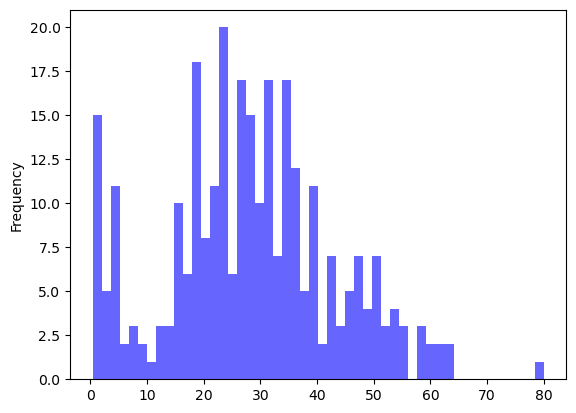

In [25]:
import matplotlib.pyplot as plt
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Age"].plot.hist(alpha=0.6, color = 'blue', bins=50)
plt.show

In [26]:
print(train_low_data['Age'].isnull().sum())
print(test_low_data['Age'].isnull().sum())

177
86


In [27]:
# 나이 결측치 대체
train_low_data['Age'] = train_low_data['Age'].fillna(train_low_data.groupby("Title")["Age"].transform("median"))
test_low_data['Age'] = test_low_data['Age'].fillna(test_low_data.groupby("Title")["Age"].transform("median"))

In [28]:
#train_low_data
train_low_data.loc[   train_low_data['Age'] <= 10, 'Age_clean'] = 0
train_low_data.loc[(  train_low_data['Age'] > 10) & (  train_low_data['Age'] <= 16), 'Age_clean'] = 1
train_low_data.loc[(  train_low_data['Age'] > 16) & (  train_low_data['Age'] <= 20), 'Age_clean'] = 2
train_low_data.loc[(  train_low_data['Age'] > 20) & (  train_low_data['Age'] <= 26), 'Age_clean'] = 3
train_low_data.loc[(  train_low_data['Age'] > 26) & (  train_low_data['Age'] <= 30), 'Age_clean'] = 4
train_low_data.loc[(  train_low_data['Age'] > 30) & (  train_low_data['Age'] <= 36), 'Age_clean'] = 5
train_low_data.loc[(  train_low_data['Age'] > 36) & (  train_low_data['Age'] <= 40), 'Age_clean'] = 6
train_low_data.loc[(  train_low_data['Age'] > 40) & (  train_low_data['Age'] <= 46), 'Age_clean'] = 7
train_low_data.loc[(  train_low_data['Age'] > 46) & (  train_low_data['Age'] <= 50), 'Age_clean'] = 8
train_low_data.loc[(  train_low_data['Age'] > 50) & (  train_low_data['Age'] <= 60), 'Age_clean'] = 9
train_low_data.loc[   train_low_data['Age'] > 60, 'Age_clean'] = 10

#test_low_data
test_low_data.loc[ test_low_data['Age'] <= 10, 'Age_clean'] = 0
test_low_data.loc[(test_low_data['Age'] > 10) & (test_low_data['Age'] <= 16), 'Age_clean'] = 1
test_low_data.loc[(test_low_data['Age'] > 16) & (test_low_data['Age'] <= 20), 'Age_clean'] = 2
test_low_data.loc[(test_low_data['Age'] > 20) & (test_low_data['Age'] <= 26), 'Age_clean'] = 3
test_low_data.loc[(test_low_data['Age'] > 26) & (test_low_data['Age'] <= 30), 'Age_clean'] = 4
test_low_data.loc[(test_low_data['Age'] > 30) & (test_low_data['Age'] <= 36), 'Age_clean'] = 5
test_low_data.loc[(test_low_data['Age'] > 36) & (test_low_data['Age'] <= 40), 'Age_clean'] = 6
test_low_data.loc[(test_low_data['Age'] > 40) & (test_low_data['Age'] <= 46), 'Age_clean'] = 7
test_low_data.loc[(test_low_data['Age'] > 46) & (test_low_data['Age'] <= 50), 'Age_clean'] = 8
test_low_data.loc[(test_low_data['Age'] > 50) & (test_low_data['Age'] <= 60), 'Age_clean'] = 9
test_low_data.loc[ test_low_data['Age'] > 60, 'Age_clean'] = 10

In [29]:
train_low_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [30]:
train_low_data['Cabin'].str[:1].value_counts()

Cabin
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [31]:
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

train_low_data['Cabin_clean'] = train_low_data['Cabin'].str[:1]
train_low_data['Cabin_clean'] = train_low_data['Cabin_clean'].map(mapping)

test_low_data['Cabin_clean'] = test_low_data['Cabin'].str[:1]
test_low_data['Cabin_clean'] = test_low_data['Cabin_clean'].map(mapping)

<function matplotlib.pyplot.show(close=None, block=None)>

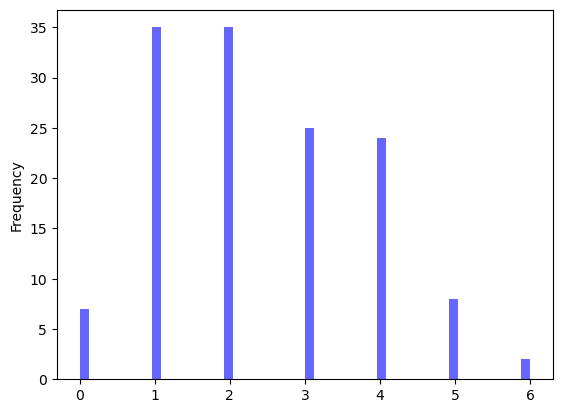

In [32]:
survived = train_low_data[train_low_data["Survived"] == 1]
survived["Cabin_clean"].plot.hist(alpha=0.6, color = 'blue', bins=50)
plt.show

In [33]:
train_low_data["Cabin_clean"] = train_low_data.groupby("Pclass")["Cabin_clean"].transform(lambda x: x.fillna(x.median()))
test_low_data["Cabin_clean"] = test_low_data.groupby("Pclass")["Cabin_clean"].transform(lambda x: x.fillna(x.median()))

In [34]:
print(train_low_data['Cabin_clean'].value_counts())
print(test_low_data['Cabin_clean'].value_counts())

Cabin_clean
5.0    492
4.5    168
2.0     99
1.0     47
3.0     33
4.0     32
0.0     15
6.0      4
7.0      1
Name: count, dtype: int64
Cabin_clean
5.0    308
2.0     62
1.0     18
3.0     13
4.0      9
0.0      7
6.0      1
Name: count, dtype: int64


In [35]:
train_low_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_clean,Embarked_clean,Family,Solo,FareBin,Fare_clean,Title,Title_clean,Age_clean,Cabin_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,2,2,0,"(-0.001, 7.854]",0,Mr,2,3.0,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,2,0,"(39.688, 512.329]",4,Mrs,3,6.0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,2,1,1,"(7.854, 10.5]",1,Miss,1,3.0,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,2,2,0,"(39.688, 512.329]",4,Mrs,3,5.0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,2,1,1,"(7.854, 10.5]",1,Mr,2,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,2,1,1,"(10.5, 21.679]",2,Other,4,4.0,4.5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,2,1,1,"(21.679, 39.688]",3,Miss,1,2.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,...,0,2,4,0,"(21.679, 39.688]",3,Miss,1,3.0,5.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,0,1,1,"(21.679, 39.688]",3,Mr,2,3.0,2.0


In [36]:
test_low_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Sex_clean,Embarked_clean,Family,Solo,FareBin,Fare_clean,Title,Title_clean,Age_clean,Cabin_clean
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,1,1,1,"(7.796, 11.025]",1,Mr,2,5.0,5.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,2,2,0,"(-0.001, 7.796]",0,Mrs,3,8.0,5.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,1,1,1,"(7.796, 11.025]",1,Mr,2,10.0,5.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,2,3,0,"(11.025, 21.438]",2,Mrs,3,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.5,0,0,A.5. 3236,8.0500,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,0,0,1,1,"(46.62, 512.329]",4,Other,4,6.0,2.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,2,1,1,"(-0.001, 7.796]",0,Mr,2,6.0,5.0
416,1308,3,"Ware, Mr. Frederick",male,28.5,0,0,359309,8.0500,NaN,...,1,2,1,1,"(7.796, 11.025]",1,Mr,2,4.0,5.0


In [37]:
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'Family',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean',
    'Fare_clean',
]

label = [
    'Survived',
]

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_ = train_low_data[feature]
Y_ = train_low_data[label]

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2, random_state=1)

In [39]:
X_train

,Pclass,SibSp,Parch,Sex_clean,Embarked_clean,Family,Solo,Title_clean,Age_clean,Cabin_clean,Fare_clean
301,3,2,0,1,1,3,0,2,4.0,5.0,3
309,1,0,0,0,0,1,1,1,4.0,4.0,4
516,2,0,0,0,2,1,1,3,5.0,5.0,1
120,2,2,0,1,2,3,0,2,3.0,4.5,4
570,2,0,0,1,2,1,1,2,10.0,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...
715,3,0,0,1,2,1,1,2,2.0,5.0,0
767,3,0,0,0,1,1,1,1,5.0,5.0,0
72,2,0,0,1,2,1,1,2,3.0,4.5,4
235,3,0,0,0,2,1,1,1,3.0,5.0,0


In [40]:
Y_train

,Survived
301,1
309,1
516,1
120,0
570,1
...,...
715,0
767,0
72,0
235,0


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 생성

model = Sequential()
#input_shape=(11,)은 각 입력 샘플이 11개의 특성(feature)을 가지고 있음을 의미
model.add(Dense(256, input_shape=(11,), activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# 모델 Compile
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt,
    loss = "binary_crossentropy",
    metrics=["accuracy"])

model.summary()

2025-04-09 22:23:07.326843: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6411 - loss: 0.6957 - val_accuracy: 0.6760 - val_loss: 0.5887
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7442 - loss: 0.5554 - val_accuracy: 0.7318 - val_loss: 0.5704
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7982 - loss: 0.4544 - val_accuracy: 0.7765 - val_loss: 0.5349
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8249 - loss: 0.4287 - val_accuracy: 0.7598 - val_loss: 0.5258
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8291 - loss: 0.4291 - val_accuracy: 0.7598 - val_loss: 0.4914
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8444 - loss: 0.3950 - val_accuracy: 0.7654 - val_loss: 0.5553
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8308 - loss: 0.3987 - val_accuracy: 0.7151 - val_loss: 0.5540
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8337 - loss: 0.3977 - val_accuracy: 0.759

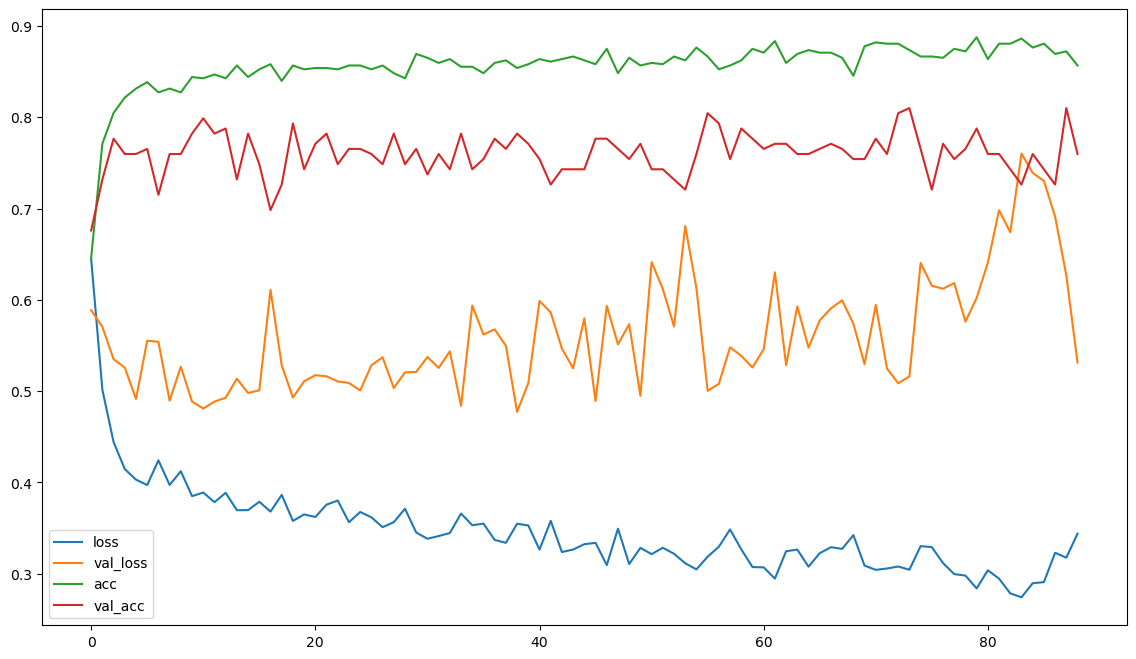

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=300)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=500, callbacks=[early_stopping_callback, model_checkpoint_callback])


plt.figure(figsize=(14,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [43]:
test_data = test_low_data[feature]
test_data

,Pclass,SibSp,Parch,Sex_clean,Embarked_clean,Family,Solo,Title_clean,Age_clean,Cabin_clean,Fare_clean
0,3,0,0,1,1,1,1,2,5.0,5.0,1
1,3,1,0,0,2,2,0,3,8.0,5.0,0
2,2,0,0,1,1,1,1,2,10.0,5.0,1
3,3,0,0,1,2,1,1,2,4.0,5.0,1
4,3,1,1,0,2,3,0,3,3.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,2,1,1,2,4.0,5.0,1
414,1,0,0,0,0,1,1,4,6.0,2.0,4
415,3,0,0,1,2,1,1,2,6.0,5.0,0
416,3,0,0,1,2,1,1,2,4.0,5.0,1


In [44]:
prediction = model.predict(test_data)
prediction

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[1.72069088e-01],
       [1.00246191e-01],
       [2.18176171e-02],
       [1.33853018e-01],
       [3.03615868e-01],
       [2.14192569e-01],
       [6.12251580e-01],
       [9.74945500e-02],
       [8.38097513e-01],
       [9.64125097e-02],
       [1.33853018e-01],
       [4.15866464e-01],
       [9.99498367e-01],
       [1.07270822e-01],
       [9.86542344e-01],
       [9.26649690e-01],
       [2.04637676e-01],
       [4.22922432e-01],
       [2.83372968e-01],
       [1.08419597e-01],
       [5.65977454e-01],
       [8.28154325e-01],
       [9.97984052e-01],
       [7.53279805e-01],
       [9.99844551e-01],
       [6.57680333e-02],
       [9.99992907e-01],
       [4.22922432e-01],
       [4.13183093e-01],
       [1.86174959e-01],
       [1.62496895e-01],
       [7.05025569e-02],
       [6.69171035e-01],
       [8.14770520e-01],
       [6.54571712e-01],
       [5.33270538e-01],
       [5.57409406e-01],
       [5.57409406e-01],
       [1.12490438e-01],
       [1.63772225e-01],


In [45]:
# 가장 좋은 모델 불러오기
model.load_weights('best_model.keras')

test_data = test_low_data[feature]
predict = model.predict(test_data)
predicted = tf.cast(predict > 0.5, dtype=tf.int32)
predicted = predicted.numpy()
#cast_f = lambda x:0 if x>=0.5 else 1
#predict = predict.apply(cast_f)

result =pd.DataFrame({'PassengerId': test_low_data['PassengerId'],'Survived': predicted.flatten()})
result.to_csv('result.csv', index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
